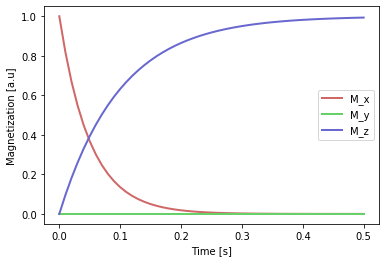

In [1]:
import numpy as np
import PAM_config as PAM
from operators.PAM_rlx_op import PAM_rlx_op
from graphics.PAM_plot_mag import PAM_plot_mag

# PAM test of the PAM_Rlx_op function

# Independent Variables
T1 = 0.10     # [s]
T2 = 0.05     # [s]
dt = 1e-2     # [s]
N_pts = 50.   # [number]
M0 = 1.0      # Define the equilibrium magnetization [a.u]
dur = N_pts*dt+np.spacing(1)       # Event duration [s]

# Dependent variables
t_vec = np.arange(0,dur,dt)
M_i = np.array([[M0, 0.0, 0.0, 1.0]]) # Define the intial magnetization
M = np.zeros((4,len(t_vec)))
M[:,0] = M_i;            # Set the initial condition

# Define the relaxation operator
drlx_op = PAM_rlx_op(T1,T2,dt,M0)

# Define the relaxation time course
t_ind=1
for t in np.r_[0:t_vec.size-1]:
    M[:,t_ind] = drlx_op@M[:,t_ind-1]
    t_ind += 1

# Plot the resulting magnetization
H = PAM_plot_mag(t_vec,M)